RAIN - Real & Artificial Intelligence for Neuroscience

## Automatic analysis
- Use a trained model from `3a-Create_models` to automatically label exploratory behaviour in position files.

#### Requirements:
- The position.csv files.
- A trained model.

---
#### Load the necessary modules

In [2]:
from pathlib import Path
import rainstorm.automatic_analysis as rst

rainstorm.modeling successfully imported. GPU devices detected: []


---
#### 1. State your project path
You need to define the path to the same folder used in `2a-Prepare_positions`, and the path to the parameters file (which contains the parameters for automatic analysis).

On the params.yaml file, **change the model_path for the path to the trained model** created in `3a-Create_models`.

In [3]:
# State your path:
base = Path(r'C:\Users\dhers\Desktop\RAINSTORM')

folder_path = base / r'examples\NOR'
params = folder_path / 'params.yaml'

---
#### 2. Run the model on all the data selected

In [4]:
rst.create_autolabels(params)

1405/1405 [==============================] - 5s 2ms/step
Saved autolabels to NOR_TR_01_autolabels.csv
1407/1407 [==============================] - 3s 2ms/step
Saved autolabels to NOR_TR_02_autolabels.csv
1403/1403 [==============================] - 3s 2ms/step
Saved autolabels to NOR_TR_03_autolabels.csv
1405/1405 [==============================] - 3s 2ms/step
Saved autolabels to NOR_TR_04_autolabels.csv
1407/1407 [==============================] - 3s 2ms/step
Saved autolabels to NOR_TR_05_autolabels.csv
1407/1407 [==============================] - 3s 2ms/step
Saved autolabels to NOR_TR_06_autolabels.csv
1395/1395 [==============================] - 3s 2ms/step
Saved autolabels to NOR_TR_07_autolabels.csv
1406/1406 [==============================] - 3s 2ms/step
Saved autolabels to NOR_TR_08_autolabels.csv
1404/1404 [==============================] - 3s 2ms/step
Saved autolabels to NOR_TR_09_autolabels.csv
1406/1406 [==============================] - 3s 2ms/step
Saved autolabels to NOR_T

---
---
#### A new csv file was created for each video, containing the autolabels.

We can:
- Continue on this notebook and compare the results of the manual, geometric & automatic methods on our example files
- Skip the methods comparison, go straight to `4-Seize_labels` and use the autolabels to plot the results of the experiment
---

## Compare labels
Lets do a quick recap of what we have done so far...

- Recorded mice exploring objects.
- Analyzed the videos using DeepLabCut, a pose estimation toolkit.
- **Manually labeled** the positions of the mice using the Rainstorm Behavioral Tagger.
- Processed the positions on 1-Prepare_positions.ipynb.
- **Geometrically labeled** the positions on 2-Geometric_labeling.ipynb.
- Trained some Artificial Neural Networks on 3-Create_models.ipynb.
- **Automatically labeled** the positions on 4-Automatic_analysis.ipynb.

And here we are! Now, we can compare between manual labels, geolabels & autolabels.

I have labeled the example videos myself using the RAINSTORM labeler tool, and left those manual labels available on the example folder.

All you need to do is to **move the *labels* folder into the *TS* folder**, and run the notebook.

If you want to see the original videos and label them to compare yourself with the machine, feel free to write: sdhers@fbmc.fcen.uba.ar

---
#### 3. Polar graph 
A great way of visualizing the distance and angle of approach to an object is to use a polar graph. The distance is represented in the radius of the circle, and the circumference represents the angle of the vector from the head to the nose.

Since the graph is symmetrical, we will use the left side to color the automatic labels in red, and the right side to color the manual labels in blue. The graph will also show the geometric labels as all the points that fit inside the dashed line.

Choosing file NOR_TS_01_positions.csv


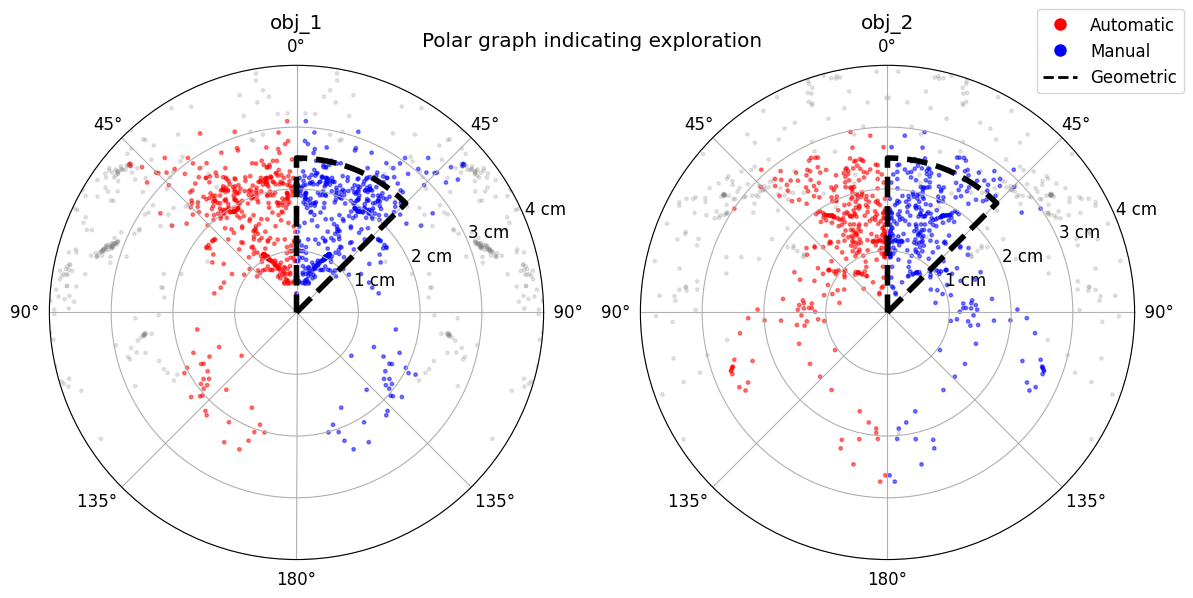

In [6]:
# We can open a single example file and it's labels
positions, manual_labels, geolabels, autolabels = rst.compare_labels(folder_path, include_all=False)

rst.polar_graph(params, positions, autolabels, manual_labels)

#### We can load all the data from all the available files and plot the polar graph again

Including all files


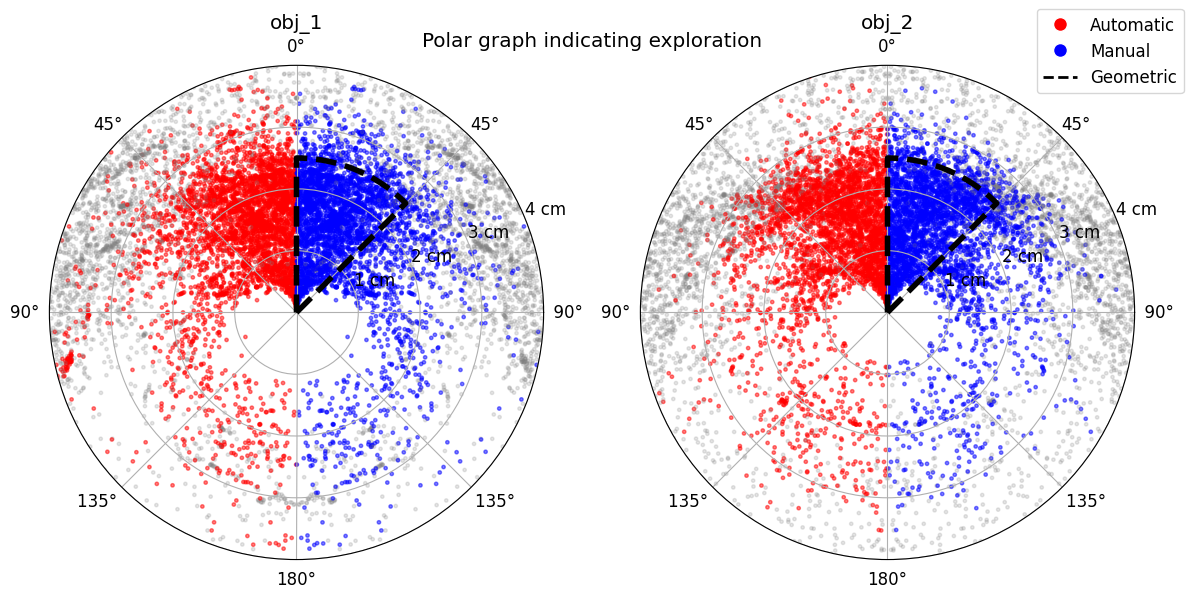

In [7]:
# This time we set 'include_all' to True
all_positions, all_manual_labels, all_geolabels, all_autolabels = rst.compare_labels(folder_path, include_all=True)

# This time it might take a few seconds
rst.polar_graph(params, all_positions, all_autolabels, all_manual_labels)

---
#### 4. Evaluate accuracy of predictions
Finally, we can evaluate the accuracy of the predictions by comparing the geometric and automatic labels to the manual labels.

In [8]:
# For geolabels
rst.accuracy_scores(all_manual_labels, all_geolabels, "geometric")

Mice explored 9.883713150182661% of the time.
The geometric method measured 6.387078644167592% of the time as exploration.
It got 37.381532629298675% of false negatives and 2.0037909558624425% of false positives.


In [9]:
# For autolabels
rst.accuracy_scores(all_manual_labels, all_autolabels, "automatic")

Mice explored 9.883713150182661% of the time.
The automatic method measured 10.085776606136841% of the time as exploration.
It got 3.05984294611427% of false negatives and 5.104251286217168% of false positives.


---
---
#### Both geometric and automatic methods are flawed when compared to human labeling.
#### However, as the only human responsible for the example manual labels provided, let me tell you that I am flawed too.
#### Probably if more people labeled these videos and we compare against the average labels, we would have less error.

We can:
- Go to `4-Seize_labels` and use your favorite labels (geo, auto or manual) to plot the results of the experiment.

---
RAINSTORM - Created on Apr 18, 2024 - @author: Santiago D'hers